# In this project, we will concentrate on analysing all of the data from the AIRBNB dataset. All of the knowledge learnt so far from pandas and numpy will be applied.

In [41]:
import numpy as np
import pandas as pd

data = pd.read_csv('airbnb/Airbnb_Open_Data.csv')

data.shape

data.head()



<ipython-input-41-5cfc31fe59e9>:4: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('airbnb/Airbnb_Open_Data.csv')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


# From what we can see initially, data cleaning needs to be done by firstly adjusting the column titles as below:

In [42]:
data.rename(columns={'NAME':'airbnb name','number of reviews':'reviews_sum','calculated host listings count':'host listings',
                     'house_rules':'rules','minimum nights':'min_nights','host_identity_verified':'host_verify','neighbourhood group':'area'})



,id,airbnb name,host id,host_verify,host name,area,neighbourhood,lat,long,country,...,service fee,min_nights,reviews_sum,last review,reviews per month,review rate number,host listings,availability 365,rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


# Next, from the first five rows, let's find out whether there are any empty data entries

In [43]:
data.head().isnull().sum()

,0
id,0
NAME,1
host id,0
host_identity_verified,1
host name,0
neighbourhood group,0
neighbourhood,0
lat,0
long,0
country,0


#Once we know the above, lets also find out if there are any duplicates.


In [44]:
data.duplicated().sum()

np.int64(541)

That is a lot of duplicates in the whole document but lets focus on the top 5 rows.

In [45]:
data.head().duplicated().sum()

np.int64(0)

#Now lets dive deep into the positions which have an empty field.


In [46]:
data[['host_identity_verified']].head()



,host_identity_verified
0,unconfirmed
1,verified
2,NaN
3,unconfirmed
4,verified


# So from what we can see above, position 3rd from the top has not got a data entry. Lets dive into it:

In [47]:
data.query('id == 1002403')

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.9419,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN


# We need to change the 'Nan' of all positions to 'unconfirmed' in order to make it more readable. In next step we change it accordingly to the inputs.

In [49]:

data.fillna('unconfirmed', inplace=True)

data.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,unconfirmed
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,unconfirmed
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.9419,United States,...,$124,3.0,0.0,unconfirmed,unconfirmed,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",unconfirmed
3,1002755,unconfirmed,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,unconfirmed,unconfirmed
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.1,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",unconfirmed




# It has no host_identity and no license. 2x unverified is a lot of data missing.


In [50]:
data['host_identity_verified'].replace({'unconfirmed':'Unverified'}, inplace=True)


# Don't forget to make the capital letters of all 'verified' rows

data.replace({'verified':'Verified'}, inplace=True)

data.head()



<ipython-input-50-d3539da17b12>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['host_identity_verified'].replace({'unconfirmed':'Unverified'}, inplace=True)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,Unverified,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,unconfirmed
1,1002102,Skylit Midtown Castle,52335172823,Verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,unconfirmed
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,Unverified,Elise,Manhattan,Harlem,40.80902,-73.9419,United States,...,$124,3.0,0.0,unconfirmed,unconfirmed,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",unconfirmed
3,1002755,unconfirmed,85098326012,Unverified,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,unconfirmed,unconfirmed
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,Verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.1,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",unconfirmed


# Let's say now that we want to add a license to the 'Skylit Midtown Castle'. Let`s try!

In [56]:
data.loc[data['NAME'] == 'Skylit Midtown Castle', 'license'] = data.loc[data['NAME'] == 'Skylit Midtown Castle', 'license'].replace({'unconfirmed':'Success'})


data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,Unverified,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,unconfirmed
1,1002102,Skylit Midtown Castle,52335172823,Verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,Success
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,Unverified,Elise,Manhattan,Harlem,40.80902,-73.9419,United States,...,$124,3.0,0.0,unconfirmed,NEEDS ATTENTION!,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",unconfirmed
3,1002755,unconfirmed,85098326012,Unverified,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,unconfirmed,unconfirmed
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,Verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.1,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",unconfirmed


# Moving on, we cannot have 'unverified' in the reviews per month - so let's change that to 'NEEDS ATTENTION!'. Also let's make sure it doesn't repeat over again.

In [55]:
data['reviews per month'] = data['reviews per month'].map(lambda x: 'NEEDS ATTENTION!' if x == 'unconfirmed' else x)

data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,Unverified,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,unconfirmed
1,1002102,Skylit Midtown Castle,52335172823,Verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,unconfirmed
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,Unverified,Elise,Manhattan,Harlem,40.80902,-73.9419,United States,...,$124,3.0,0.0,unconfirmed,NEEDS ATTENTION!,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",unconfirmed
3,1002755,unconfirmed,85098326012,Unverified,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,unconfirmed,unconfirmed
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,Verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.1,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",unconfirmed


# **#2** Having the Data Cleaned, lets now move on to some analysis. Below we start with finding out the sums of each city that the Airbnbs are located

In [31]:
data['neighbourhood group'].value_counts()


,count
neighbourhood group,
Manhattan,43792
Brooklyn,41842
Queens,13267
Bronx,2712
Staten Island,955
unconfirmed,29
manhatan,1
brookln,1


# After finding out the how many Airbnbs are in each city, we can now plot the first 10 values.

Text(0, 0.5, 'Number of Airbnbs')

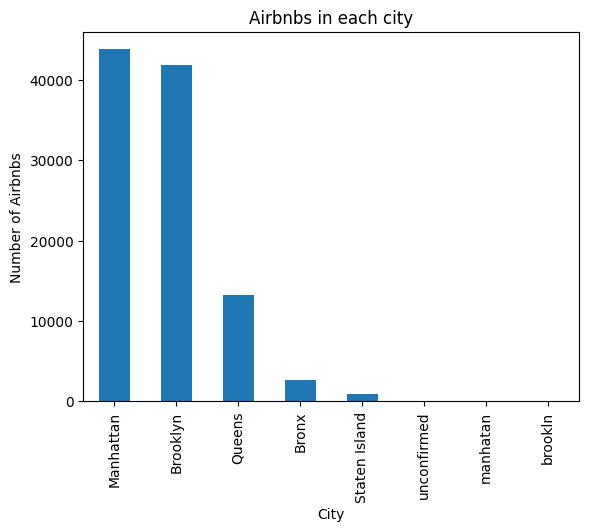

In [32]:
ax = data['neighbourhood group'].value_counts().head(10).plot(kind='bar',title='Airbnbs in each city')

ax.set_xlabel('City')
ax.set_ylabel('Number of Airbnbs')

## Once finding out the amount of airbns in each city, we can find out amounts of listings that are usually put up.

Text(0, 0.5, 'Number of hosts')

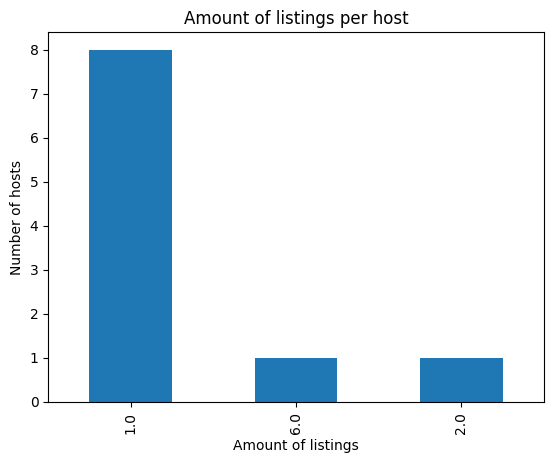

In [33]:
ax1 = data.head(10)['calculated host listings count'].value_counts().plot(kind='bar', title='Amount of listings per host')

ax1.set_xlabel('Amount of listings')
ax1.set_ylabel('Number of hosts')
